## **Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

## **Understanding the Lasso Regression**

**Introduction** <br>
**Lasso Regression** is another regularization technique used to improve the performance and interpretability of linear regression models, especially when we have many correlated features or features that are not very useful. <br><br>

**What is it?**

* Lasso Regression adds a penalty equal to the **absolute value** of the magnitude of coefficients (`L1 regularization`) to the cost function of linear regression.<br><br>

**How does it work?**

* Linear regression minimizes the **sum of squared errors** between predicted and actual values.
* Lasso modifies this by adding a penalty term proportional to the **sum of absolute coefficients**:
  \n
  `Objective = SSE + alpha * sum(|theta|)` <br>
  where `alpha` is a hyperparameter controlling how much penalty is applied.<br><br>

**What is the objective?**

* To find a balance between fitting the data well and keeping model coefficients small or even forcing some to zero.
* This makes Lasso useful for **feature selection**, because it can completely eliminate some features by setting their coefficients to zero.<br><br>

**Why use it? What problems does it solve?**

Lasso Regression is especially useful when:

* **Feature Selection:** It automatically selects important features by shrinking less important ones to zero.
* **Overfitting Reduction:** By adding regularization, the model becomes simpler and more generalizable.
* **Multicollinearity:** Helps stabilize estimates when features are highly correlated.<br><br>

**Effect of the penalty:**

* The `alpha` parameter controls the strength of regularization.
  * Smaller `alpha`: behaves closer to simple linear regression.
  * Larger `alpha`: increases the penalty, shrinking more coefficients toward zero.<br><br>

**Betterment compared to simple linear regression:**

* Lasso Regression can perform **feature selection**, which Ridge Regression cannot.
* Ridge shrinks coefficients but keeps them all nonzero, while Lasso can make some coefficients exactly zero.<br><br>

**Mechanism with Example:**

In simple linear regression, we minimize:

$SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

In Lasso, we minimize:

$Objective = SSE + \alpha \sum_{j=1}^{p} |\theta_j|$

This L1 penalty forces some coefficients to become exactly zero if they contribute little, effectively removing unimportant features.

### **Why Shrink Coefficients?**

* To reduce model complexity.
* To prevent overfitting.
* To make the model interpretable (fewer active features).<br><br>

**Example:**

Imagine predicting house prices using many correlated features like:
* Number of bedrooms
* Square footage
* Number of bathrooms
* Neighborhood rating

Lasso will keep the most important features (e.g., square footage, neighborhood) and set the less important ones (e.g., number of bedrooms) to zero.

---

## **Generating & Exploring the Dataset**

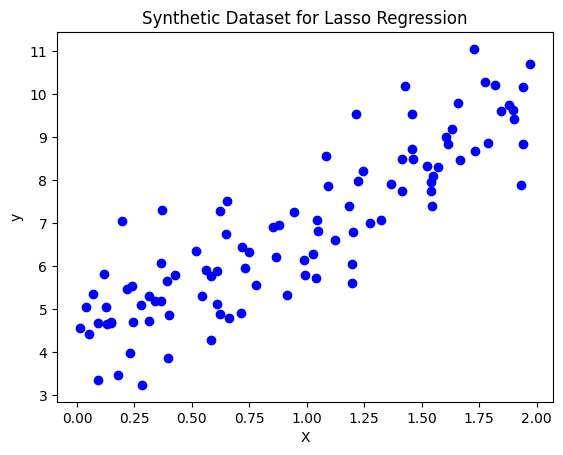

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)
# Generate 100 random numbers between 0 and 2 for X
X = 2 * np.random.rand(100, 1)
# Generate y which has a linear relationship with X plus some noise
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the generated data
plt.scatter(X, y, color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Dataset for Lasso Regression")
plt.show()

## **Custom Lasso Regression**

In [ ]:
class LassoRegression:
    # Initialize Lasso Regression with alpha, learning rate, and iterations
    def __init__(self, alpha=0.1, learning_rate=0.01, n_iterations=1000):
        # Regularization strength
        self.alpha = alpha
        # Step size for gradient descent
        self.learning_rate = learning_rate
        # Number of iterations for optimization
        self.n_iterations = n_iterations
        # Model weights (coefficients)
        self.theta = None

    # This Function Trains the model using the given data
    def fit(self, X, y):
        # Storing no of samples(instances) and features
        m, n = X.shape
        # Add a bias column (intercept term) to X
        X_b = np.c_[np.ones((m, 1)), X]
        # Initialize weights to zeros
        self.theta = np.zeros((n + 1, 1))
        # Reshape y to a column vector
        y = y.reshape(-1, 1)

        # Perform gradient descent for a specified number of iterations
        for _ in range(self.n_iterations):
            # Predict y values

            y_pred = X_b.dot(self.theta)
            # Calculate the error
            error = y_pred - y

            # Calculate the gradient descent
            mse_gradient = (1/m) * X_b.T.dot(error)

            # Calculate the gradient of the L1 penalty (sign of coefficients)
            l1_penalty = (self.alpha/m) * np.sign(self.theta)

            # Do not regularize the bias term (intercept)
            l1_penalty[0] = 0

            # Calculate the total gradient (MSE gradient + L1 penalty gradient)
            total_gradient = mse_gradient + l1_penalty

            # Update the weights using the learning rate and total gradient
            self.theta -= self.learning_rate * total_gradient

    # Make predictions using the trained model
    def predict(self, X):
        # Add a bias column to X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Return the predicted y values
        return X_b.dot(self.theta)

## **Step-by-Step Custom Lasso Regression on a Small Dataset**

In [ ]:
# Create a small dataset
X_small = np.array([[1], [2], [3], [4], [5]])
y_small = np.array([[3], [5], [7], [9], [11]])

# Initialize the custom Lasso Regression model
lasso_small_step_by_step = LassoRegression(alpha=0.1, learning_rate=0.01, n_iterations=1)

# --- Step-by-step execution of the fit method ---

# 1. Storing number of training examples or instances (m) and features (n)
m, n = X_small.shape
# Output: m = 5, n = 1

# 2. Add a bias term to the input features
x_with_bias = np.c_[np.ones((m, 1)), X_small]
# Output: x_with_bias = [[1. 1.]
#                        [1. 2.]
#                        [1. 3.]
#                        [1. 4.]
#                        [1. 5.]]

# 3. Initialize model parameters (weights) to zeros
theta = np.zeros((n+1, 1))
# Output: theta = [[0.]
#                  [0.]]

# 4. Reshape the target variable
y_reshaped = y_small.reshape(-1, 1)
# Output: y_reshaped = [[ 3]
#                       [ 5]
#                       [ 7]
#                       [ 9]
#                       [11]]

# Gradient Descent (demonstrating the first iteration)
# for i in range(self.n_iterations): # Looping for n_iterations times

# Calculate predicted values
y_pred = x_with_bias.dot(theta)
# Output: y_pred = [[0.]
#                   [0.]
#                   [0.]
#                   [0.]
#                   [0.]]

# Calculate the error (difference between predicted and actual values)
error = y_pred - y_reshaped
# Output: error = [[-3.]
#                  [-5.]
#                  [-7.]
#                  [-9.]
#                 [-11.]]

# Calculate the gradient of the Mean Squared Error
mse_gradient = (1/m) * x_with_bias.T.dot(error)
# Output: mse_gradient = [[ -7. ]
#                         [-25. ]]

# Calculate the gradient (subgradient) of the L1 penalty (Lasso regularization)
l1_penalty = (lasso_small_step_by_step.alpha/m) * np.sign(theta)
l1_penalty[0] = 0  # Exclude the bias term from regularization
# Output: l1_penalty = [[0. ]
#                      [0.02]]   # since sign(0) is 0 in this implementation

# Calculate the total gradient (MSE gradient + L1 penalty gradient)
total_gradient = mse_gradient + l1_penalty
# Output: total_gradient = [[ -7. ]
#                           [-24.98]]

# Update the model parameters using the gradient and learning rate
theta -= lasso_small_step_by_step.learning_rate * total_gradient
# Output after first iteration: theta = [[0.07   ]
#                                       [0.2498 ]]

# Note: In the actual fit method, this process repeats for n_iterations.
# After the loop, self.theta is updated with the final theta.
lasso_small_step_by_step.theta = theta

print("Theta after 1 iteration:", lasso_small_step_by_step.theta)

Theta after 1 iteration: [[0.07]
 [0.25]]


## **Training & Evaluatin Custom Lasso Regression**

Scratch Lasso Regression:
MSE: 0.8065874172965013
R²: 0.7692727251561188
 


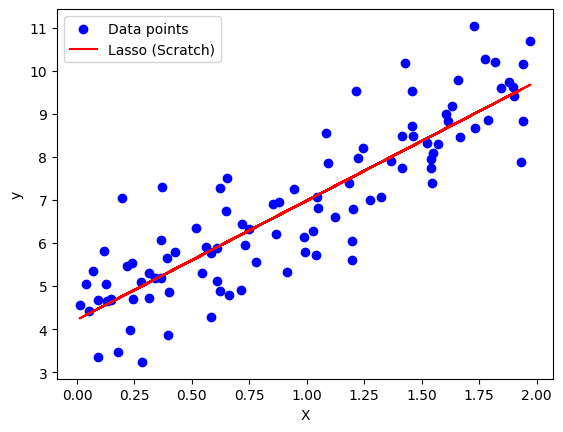

In [ ]:
# Create an instance of custom Lasso model
lasso_scratch = LassoRegression(alpha=0.1, learning_rate=0.1, n_iterations=1000)
# Fit(Training) the model
lasso_scratch.fit(X, y)
# Predict
y_pred_scratch = lasso_scratch.predict(X)

# Evaluate
print("Scratch Lasso Regression:")
print("MSE:", mean_squared_error(y, y_pred_scratch))
print("R²:", r2_score(y, y_pred_scratch))
print(" ")

# Plot results
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred_scratch, color="red", label="Lasso (Scratch)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## **Sklearn's Lasso Regression**


Scikit-learn Lasso Regression:
MSE: 0.8351185070345459
R²: 0.7611113027951679
 


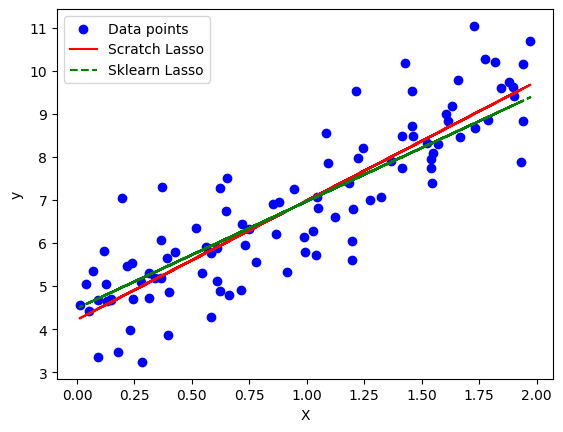

In [ ]:
# Train Lasso using sklearn
lasso_sklearn = Lasso(alpha=0.1)
# Fit(Training) the model
lasso_sklearn.fit(X, y)
# Predict
y_pred_sklearn = lasso_sklearn.predict(X)

# Evaluate sklearn model
print("\nScikit-learn Lasso Regression:")
print("MSE:", mean_squared_error(y, y_pred_sklearn))
print("R²:", r2_score(y, y_pred_sklearn))
print(" ")

# Plot comparison
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred_scratch, color="red", label="Scratch Lasso")
plt.plot(X, y_pred_sklearn, color="green", linestyle="--", label="Sklearn Lasso")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## **Effects of Lasso**

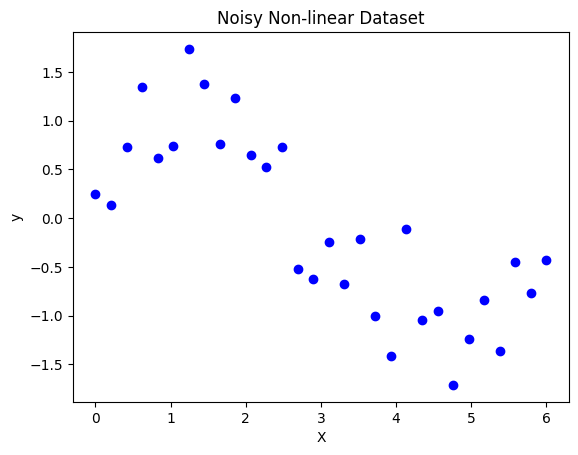

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a noisy dataset
np.random.seed(42)
X = np.linspace(0, 6, 30).reshape(-1, 1)
y = np.sin(X) + np.random.randn(30, 1) * 0.5  # sine curve

plt.scatter(X, y, color="blue")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Noisy Non-linear Dataset")
plt.show()

Linear Regression (degree=15):
MSE: 0.12000591744781268
R²: 0.8592159320323882
 


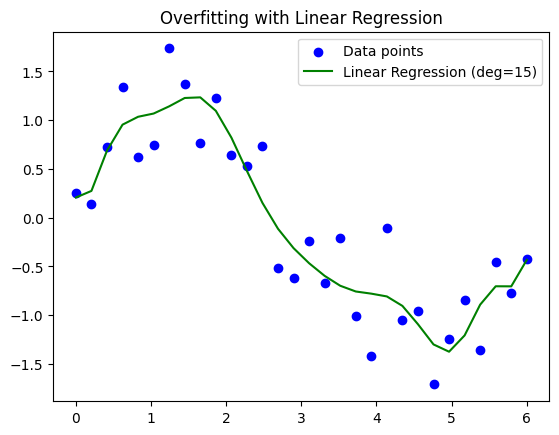

In [ ]:
# Polynomial Features
poly_features = PolynomialFeatures(degree=15, include_bias=False)

# Linear Regression (no regularization)
lin_model = make_pipeline(poly_features, LinearRegression())
lin_model.fit(X, y)
y_lin = lin_model.predict(X)

print("Linear Regression (degree=15):")
print("MSE:", mean_squared_error(y, y_lin))
print("R²:", r2_score(y, y_lin))
print(" ")

plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_lin, color="green", label="Linear Regression (deg=15)")
plt.legend()
plt.title("Overfitting with Linear Regression")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.079e+00, tolerance: 2.557e-03
  model = cd_fast.enet_coordinate_descent(



Lasso Regression (degree=15, alpha=0.1):
MSE: 0.19752994601856189
R²: 0.7682691825758565
 


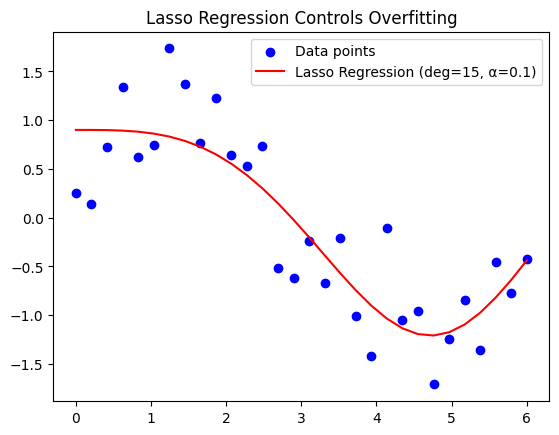

In [ ]:
# Lasso Regression (regularization)
lasso_model = make_pipeline(poly_features, Lasso(alpha=0.1, max_iter=10000))
lasso_model.fit(X, y)
y_lasso = lasso_model.predict(X)

print("\nLasso Regression (degree=15, alpha=0.1):")
print("MSE:", mean_squared_error(y, y_lasso))
print("R²:", r2_score(y, y_lasso))
print(" ")

plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_lasso, color="red", label="Lasso Regression (deg=15, α=0.1)")
plt.legend()
plt.title("Lasso Regression Controls Overfitting")
plt.show()

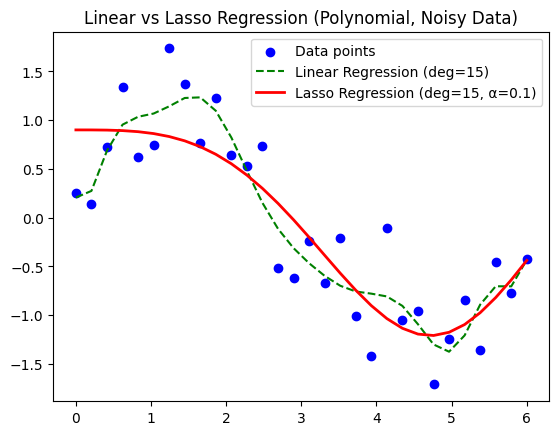

In [ ]:
# Comparing Linear vs Lasso
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_lin, color="green", linestyle="--", label="Linear Regression (deg=15)")
plt.plot(X, y_lasso, color="red", linewidth=2, label="Lasso Regression (deg=15, α=0.1)")
plt.title("Linear vs Lasso Regression (Polynomial, Noisy Data)")
plt.legend()
plt.show()